### Ambient Configuration (Pyspark - Pytorch)### 

In this section I configure Pyspark and Pytorch on the current cluster and I load datasets and images for other subsequent operations from my github repository

In [0]:
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import PCA
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [0]:
!pip install mlflow

Collecting mlflow
 Downloading mlflow-1.17.0-py3-none-any.whl (14.2 MB)
 | 10 kB 18.9 MB/s eta 0:00:01 | | 20 kB 12.7 MB/s eta 0:00:02 | | 30 kB 7.8 MB/s eta 0:00:02 | | 40 kB 5.3 MB/s eta 0:00:03 |▏ | 51 kB 5.7 MB/s eta 0:00:03 |▏ | 61 kB 5.8 MB/s eta 0:00:03 |▏ | 71 kB 6.0 MB/s eta 0:00:03 |▏ | 81 kB 6.4 MB/s eta 0:00:03 |▏ | 92 kB 5.5 MB/s eta 0:00:03 |▎ | 102 kB 5.3 MB/s eta 0:00:03 |▎ | 112 kB 5.3 MB/s eta 0:00:03 |▎ | 122 kB 5.3 MB/s eta 0:00:03 |▎ | 133 kB 5.3 MB/s eta 0:00:03 |▎ | 143 kB 5.3 MB/s eta 0:00:03 |▍ | 153 kB 5.3 MB/s eta 0:00:03 |▍ | 163 kB 5.3 MB/s eta 0:00:03 |▍ | 174 kB 5.3 MB/s eta 0:00:03 |▍ | 184 kB 5.3 MB/s eta 0:00:03 |▍ | 194 kB 5.3 MB/s eta 0:00:03 |▌ | 204 kB 5.3 MB/s eta 0:00:03 |▌ | 215 kB 5.3 MB/s eta 0:00:03 |▌ | 225 kB 5.3 MB/s eta 0:00:03 |▌ | 235 kB 5.3 MB/s eta 0:00:03 |▌ | 245 kB 5.3 MB/s eta 0:00:03 |▋ | 256 kB 5.3 MB/s eta 0:00:03 |▋ | 266 kB 5.3 MB/s eta 0:00:03 |▋ | 276 kB 5.3 MB/s eta 0:00:03 |▋ | 286 kB 5.3 MB/s eta 0:00:03 |▊ | 296 kB 5.3 MB/s eta 0:00:03 |▊ | 307 kB 5.3 MB/s eta 0:00:03 |▊ | 317 kB 5.3 MB/s eta 0:00:03 |▊ | 327 kB 5.3 MB/s eta 0:00:03 |▊ | 337 kB 5.3 MB/s eta 0:00:03 |▉ | 348 kB 5.3 MB/s eta 0:00:03 |▉ | 358 kB 5.3 MB/s eta 0:00:03 |▉ | 368 kB 5.3 MB/s eta 0:00:03 |▉ | 378 kB 5.3 MB/s eta 0:00:03 |▉ | 389 kB 5.3 MB/s eta 0:00:03 |█ | 399 kB 5.3 MB/s eta 0:00:03 |█ | 409 kB 5.3 MB/s eta 0:00:03 |█ | 419 kB 5.3 MB/s eta 0:00:03 |█ | 430 kB 5.3 MB/s eta 0:00:03 |█ | 440 kB 5.3 MB/s eta 0:00:03 |█ | 450 kB 5.3 MB/s eta 0:00:03 |█ | 460 kB 5.3 MB/s eta 0:00:03 |█ | 471 kB 5.3 MB/s eta 0:00:03 |█ | 481 kB 5.3 MB/s eta 0:00:03 |█ | 491 kB 5.3 MB/s eta 0:00:03 |█▏ | 501 kB 5.3 MB/s eta 0:00:03 |█▏ | 512 kB 5.3 MB/s eta 0:00:03 |█▏ | 522 kB 5.3 MB/s eta 0:00:03 |█▏ | 532 kB 5.3 MB/s eta 0:00:03 |█▎ | 542 kB 5.3 MB/s eta 0:00:03 |█▎ | 552 kB 5.3 MB/s eta 0:00:03 |█▎ | 563 kB 5.3 MB/s eta 0:00:03 |█▎ | 573 kB 5.3 MB/s eta 0:00:03 |█▎ | 583 kB 5.3 MB/s eta 0:00:03 |█▍ | 593 kB 5.3 MB/s eta 0:00:03 |█▍ | 604 kB 5.3 MB/s eta 0:00:03 |█▍ | 614 kB 5.3 MB/s eta 0:00:03 |█▍ | 624 kB 5.3 MB/s eta 0:00:03 |█▍ | 634 kB 5.3 MB/s eta 0:00:03 |█▌ | 645 kB 5.3 MB/s eta 0:00:03 |█▌ | 655 kB 5.3 MB/s eta 0:00:03 |█▌ | 665 kB 5.3 MB/s eta 0:00:03 |█▌ | 675 kB 5.3 MB/s eta 0:00:03 |█▌ | 686 kB 5.3 MB/s eta 0:00:03 |█▋ | 696 kB 5.3 MB/s eta 0:00:03 |█▋ | 706 kB 5.3 MB/s eta 0:00:03 |█▋ | 716 kB 5.3 MB/s eta 0:00:03 |█▋ | 727 kB 5.3 MB/s eta 0:00:03 |█▋ | 737 kB 5.3 MB/s eta 0:00:03 |█▊ | 747 kB 5.3 MB/s eta 0:00:03 |█▊ | 757 kB 5.3 MB/s eta 0:00:03 |█▊ | 768 kB 5.3 MB/s eta 0:00:03 |█▊ | 778 kB 5.3 MB/s eta 0:00:03 |█▉ | 788 kB 5.3 MB/s eta 0:00:03 |█▉ | 798 kB 5.3 MB/s eta 0:00:03 |█▉ | 808 kB 5.3 MB/s eta 0:00:03 |█▉ | 819 kB 5.3 MB/s eta 0:00:03 |█▉ | 829 kB 5.3 MB/s eta 0:00:03 |██ | 839 kB 5.3 MB/s eta 0:00:03 |██ | 849 kB 5.3 MB/s eta 0:00:03 |██ | 860 kB 5.3 MB/s eta 0:00:03 |██ | 870 kB 5.3 MB/s eta 0:00:03 |██ | 880 kB 5.3 MB/s eta 0:00:03 |██ | 890 kB 5.3 MB/s eta 0:00:03 |██ | 901 kB 5.3 MB/s eta 0:00:03 |██ | 911 kB 5.3 MB/s eta 0:00:03 |██ | 921 kB 5.3 MB/s eta 0:00:03 |██ | 931 kB 5.3 MB/s eta 0:00:03 |██▏ | 942 kB 5.3 MB/s eta 0:00:03 |██▏ | 952 kB 5.3 MB/s eta 0:00:03 |██▏ | 962 kB 5.3 MB/s eta 0:00:03 |██▏ | 972 kB 5.3 MB/s eta 0:00:03 |██▏ | 983 kB 5.3 MB/s eta 0:00:03 |██▎ | 993 kB 5.3 MB/s eta 0:00:03 |██▎ | 1.0 MB 5.3 MB/s eta 0:00:03 |██▎ | 1.0 MB 5.3 MB/s eta 0:00:03 |██▎ | 1.0 MB 5.3 MB/s eta 0:00:03 |██▎ | 1.0 MB 5.3 MB/s eta 0:00:03 |██▍ | 1.0 MB 5.3 MB/s eta 0:00:03 |██▍ | 1.1 MB 5.3 MB/s eta 0:00:03 |██▍ | 1.1 MB 5.3 MB/s eta 0:00:03 |██▍ | 1.1 MB 5.3 MB/s eta 0:00:03 |██▌ | 1.1 MB 5.3 MB/s eta 0:00:03 |██▌ | 1.1 MB 5.3 MB/s eta 0:00:03 |██▌ | 1.1 MB 5.3 MB/s eta 0:00:03 |██▌ | 1.1 MB 5.3 MB/s eta 0:00:03 |██▌ | 1.1 MB 5.3 MB/s eta 0:00:03 |██▋ | 1.1 MB 5.3 MB/s eta 0:00:03 |██▋ | 1.1 MB 5.3 MB/s eta 0:00:03 |██▋ | 1.2 MB 5.3 MB/s eta 0:00:03 |██▋ | 1.

In [0]:
import mlflow
import mlflow.sklearn

**Pytorch for LSTM**

For the implementation of LSTM I used the Pytorch framework that allows the development of Deep Learning models in an efficient way using data structures called Tensors. In this section I configure it together with torchtext which I will then need to build the vocabulary for embedding.

In [0]:
!pip install torch

Collecting torch
 Downloading torch-1.8.1-cp38-cp38-manylinux1_x86_64.whl (804.1 MB)
 | 10 kB 18.4 MB/s eta 0:00:44 | | 20 kB 23.1 MB/s eta 0:00:35 | | 30 kB 11.6 MB/s eta 0:01:10 | | 40 kB 9.2 MB/s eta 0:01:28 | | 51 kB 7.8 MB/s eta 0:01:44 | | 61 kB 6.6 MB/s eta 0:02:03 | | 71 kB 6.9 MB/s eta 0:01:56 | | 81 kB 6.9 MB/s eta 0:01:57 | | 92 kB 6.7 MB/s eta 0:02:00 | | 102 kB 6.1 MB/s eta 0:02:13 | | 112 kB 6.1 MB/s eta 0:02:13 | | 122 kB 6.1 MB/s eta 0:02:13 | | 133 kB 6.1 MB/s eta 0:02:13 | | 143 kB 6.1 MB/s eta 0:02:13 | | 153 kB 6.1 MB/s eta 0:02:13 | | 163 kB 6.1 MB/s eta 0:02:13 | | 174 kB 6.1 MB/s eta 0:02:13 | | 184 kB 6.1 MB/s eta 0:02:13 | | 194 kB 6.1 MB/s eta 0:02:13 | | 204 kB 6.1 MB/s eta 0:02:13 | | 215 kB 6.1 MB/s eta 0:02:13 | | 225 kB 6.1 MB/s eta 0:02:13 | | 235 kB 6.1 MB/s eta 0:02:13 | | 245 kB 6.1 MB/s eta 0:02:13 | | 256 kB 6.1 MB/s eta 0:02:13 | | 266 kB 6.1 MB/s eta 0:02:13 | | 276 kB 6.1 MB/s eta 0:02:13 | | 286 kB 6.1 MB/s eta 0:02:13 | | 296 kB 6.1 MB/s eta 0:02:13 | | 307 kB 6.1 MB/s eta 0:02:13 | | 317 kB 6.1 MB/s eta 0:02:13 | | 327 kB 6.1 MB/s eta 0:02:13 | | 337 kB 6.1 MB/s eta 0:02:13 | | 348 kB 6.1 MB/s eta 0:02:13 | | 358 kB 6.1 MB/s eta 0:02:13 | | 368 kB 6.1 MB/s eta 0:02:13 | | 378 kB 6.1 MB/s eta 0:02:13 | | 389 kB 6.1 MB/s eta 0:02:13 | | 399 kB 6.1 MB/s eta 0:02:13 | | 409 kB 6.1 MB/s eta 0:02:13 | | 419 kB 6.1 MB/s eta 0:02:13 | | 430 kB 6.1 MB/s eta 0:02:13 | | 440 kB 6.1 MB/s eta 0:02:13 | | 450 kB 6.1 MB/s eta 0:02:13 | | 460 kB 6.1 MB/s eta 0:02:13 | | 471 kB 6.1 MB/s eta 0:02:13 | | 481 kB 6.1 MB/s eta 0:02:13 | | 491 kB 6.1 MB/s eta 0:02:13 | | 501 kB 6.1 MB/s eta 0:02:13 | | 512 kB 6.1 MB/s eta 0:02:13 | | 522 kB 6.1 MB/s eta 0:02:13 | | 532 kB 6.1 MB/s eta 0:02:13 | | 542 kB 6.1 MB/s eta 0:02:13 | | 552 kB 6.1 MB/s eta 0:02:13 | | 563 kB 6.1 MB/s eta 0:02:13 | | 573 kB 6.1 MB/s eta 0:02:13 | | 583 kB 6.1 MB/s eta 0:02:13 | | 593 kB 6.1 MB/s eta 0:02:13 | | 604 kB 6.1 MB/s eta 0:02:13 | | 614 kB 6.1 MB/s eta 0:02:13 | | 624 kB 6.1 MB/s eta 0:02:13 | | 634 kB 6.1 MB/s eta 0:02:13 | | 645 kB 6.1 MB/s eta 0:02:13 | | 655 kB 6.1 MB/s eta 0:02:13 | | 665 kB 6.1 MB/s eta 0:02:13 | | 675 kB 6.1 MB/s eta 0:02:13 | | 686 kB 6.1 MB/s eta 0:02:13 | | 696 kB 6.1 MB/s eta 0:02:13 | | 706 kB 6.1 MB/s eta 0:02:13 | | 716 kB 6.1 MB/s eta 0:02:13 | | 727 kB 6.1 MB/s eta 0:02:13 | | 737 kB 6.1 MB/s eta 0:02:13 | | 747 kB 6.1 MB/s eta 0:02:13 | | 757 kB 6.1 MB/s eta 0:02:13 | | 768 kB 6.1 MB/s eta 0:02:13 | | 778 kB 6.1 MB/s eta 0:02:13 | | 788 kB 6.1 MB/s eta 0:02:13 | | 798 kB 6.1 MB/s eta 0:02:13 | | 808 kB 6.1 MB/s eta 0:02:13 | | 819 kB 6.1 MB/s eta 0:02:13 | | 829 kB 6.1 MB/s eta 0:02:13 | | 839 kB 6.1 MB/s eta 0:02:13 | | 849 kB 6.1 MB/s eta 0:02:13 | | 860 kB 6.1 MB/s eta 0:02:13 | | 870 kB 6.1 MB/s eta 0:02:13 | | 880 kB 6.1 MB/s eta 0:02:13 | | 890 kB 6.1 MB/s eta 0:02:13 | | 901 kB 6.1 MB/s eta 0:02:13 | | 911 kB 6.1 MB/s eta 0:02:13 | | 921 kB 6.1 MB/s eta 0:02:13 | | 931 kB 6.1 MB/s eta 0:02:13 | | 942 kB 6.1 MB/s eta 0:02:13 | | 952 kB 6.1 MB/s eta 0:02:13 | | 962 kB 6.1 MB/s eta 0:02:13 | | 972 kB 6.1 MB/s eta 0:02:13 | | 983 kB 6.1 MB/s eta 0:02:13 | | 993 kB 6.1 MB/s eta 0:02:13 | | 1.0 MB 6.1 MB/s eta 0:02:13 | | 1.0 MB 6.1 MB/s eta 0:02:13 | | 1.0 MB 6.1 MB/s eta 0:02:13 | | 1.0 MB 6.1 MB/s eta 0:02:13 | | 1.0 MB 6.1 MB/s eta 0:02:13 | | 1.1 MB 6.1 MB/s eta 0:02:13 | | 1.1 MB 6.1 MB/s eta 0:02:13 | | 1.1 MB 6.1 MB/s eta 0:02:13 | | 1.1 MB 6.1 MB/s eta 0:02:13 | | 1.1 MB 6.1 MB/s eta 0:02:13 | | 1.1 MB 6.1 MB/s eta 0:02:13 | | 1.1 MB 6.1 MB/s eta 0:02:13 | | 1.1 MB 6.1 MB/s eta 0:02:13 | | 1.1 MB 6.1 MB/s eta 0:02:12 | | 1.1 MB 6.1 MB/s eta 0:02:12 | | 1.2 MB 6.1 MB/s eta 0:02:12 | | 1.2 MB 6.1 MB/s eta 0:02:12 | | 1.2 MB 6.1 MB/s eta 0:02:12 | | 1.2 MB 6.1 MB/s eta 0:02:12 | | 1.2 MB 6.1 MB/s eta 0:02:12 | | 1.2 MB 6.1 MB/s eta 0:02:12 | | 1.2 MB 6.1 MB/s eta 0:

In [0]:
!pip install torchtext

Collecting torchtext
 Downloading torchtext-0.9.1-cp38-cp38-manylinux1_x86_64.whl (7.0 MB)
 | 10 kB 23.9 MB/s eta 0:00:01 | | 20 kB 12.3 MB/s eta 0:00:01 |▏ | 30 kB 10.8 MB/s eta 0:00:01 |▏ | 40 kB 6.4 MB/s eta 0:00:02 |▎ | 51 kB 7.5 MB/s eta 0:00:01 |▎ | 61 kB 6.6 MB/s eta 0:00:02 |▎ | 71 kB 7.3 MB/s eta 0:00:01 |▍ | 81 kB 7.6 MB/s eta 0:00:01 |▍ | 92 kB 8.1 MB/s eta 0:00:01 |▌ | 102 kB 6.1 MB/s eta 0:00:02 |▌ | 112 kB 6.1 MB/s eta 0:00:02 |▋ | 122 kB 6.1 MB/s eta 0:00:02 |▋ | 133 kB 6.1 MB/s eta 0:00:02 |▋ | 143 kB 6.1 MB/s eta 0:00:02 |▊ | 153 kB 6.1 MB/s eta 0:00:02 |▊ | 163 kB 6.1 MB/s eta 0:00:02 |▉ | 174 kB 6.1 MB/s eta 0:00:02 |▉ | 184 kB 6.1 MB/s eta 0:00:02 |▉ | 194 kB 6.1 MB/s eta 0:00:02 |█ | 204 kB 6.1 MB/s eta 0:00:02 |█ | 215 kB 6.1 MB/s eta 0:00:02 |█ | 225 kB 6.1 MB/s eta 0:00:02 |█ | 235 kB 6.1 MB/s eta 0:00:02 |█▏ | 245 kB 6.1 MB/s eta 0:00:02 |█▏ | 256 kB 6.1 MB/s eta 0:00:02 |█▏ | 266 kB 6.1 MB/s eta 0:00:02 |█▎ | 276 kB 6.1 MB/s eta 0:00:02 |█▎ | 286 kB 6.1 MB/s eta 0:00:02 |█▍ | 296 kB 6.1 MB/s eta 0:00:02 |█▍ | 307 kB 6.1 MB/s eta 0:00:02 |█▍ | 317 kB 6.1 MB/s eta 0:00:02 |█▌ | 327 kB 6.1 MB/s eta 0:00:02 |█▌ | 337 kB 6.1 MB/s eta 0:00:02 |█▋ | 348 kB 6.1 MB/s eta 0:00:02 |█▋ | 358 kB 6.1 MB/s eta 0:00:02 |█▊ | 368 kB 6.1 MB/s eta 0:00:02 |█▊ | 378 kB 6.1 MB/s eta 0:00:02 |█▊ | 389 kB 6.1 MB/s eta 0:00:02 |█▉ | 399 kB 6.1 MB/s eta 0:00:02 |█▉ | 409 kB 6.1 MB/s eta 0:00:02 |██ | 419 kB 6.1 MB/s eta 0:00:02 |██ | 430 kB 6.1 MB/s eta 0:00:02 |██ | 440 kB 6.1 MB/s eta 0:00:02 |██ | 450 kB 6.1 MB/s eta 0:00:02 |██ | 460 kB 6.1 MB/s eta 0:00:02 |██▏ | 471 kB 6.1 MB/s eta 0:00:02 |██▏ | 481 kB 6.1 MB/s eta 0:00:02 |██▎ | 491 kB 6.1 MB/s eta 0:00:02 |██▎ | 501 kB 6.1 MB/s eta 0:00:02 |██▎ | 512 kB 6.1 MB/s eta 0:00:02 |██▍ | 522 kB 6.1 MB/s eta 0:00:02 |██▍ | 532 kB 6.1 MB/s eta 0:00:02 |██▌ | 542 kB 6.1 MB/s eta 0:00:02 |██▌ | 552 kB 6.1 MB/s eta 0:00:02 |██▋ | 563 kB 6.1 MB/s eta 0:00:02 |██▋ | 573 kB 6.1 MB/s eta 0:00:02 |██▋ | 583 kB 6.1 MB/s eta 0:00:02 |██▊ | 593 kB 6.1 MB/s eta 0:00:02 |██▊ | 604 kB 6.1 MB/s eta 0:00:02 |██▉ | 614 kB 6.1 MB/s eta 0:00:02 |██▉ | 624 kB 6.1 MB/s eta 0:00:02 |██▉ | 634 kB 6.1 MB/s eta 0:00:02 |███ | 645 kB 6.1 MB/s eta 0:00:02 |███ | 655 kB 6.1 MB/s eta 0:00:02 |███ | 665 kB 6.1 MB/s eta 0:00:02 |███ | 675 kB 6.1 MB/s eta 0:00:02 |███▏ | 686 kB 6.1 MB/s eta 0:00:02 |███▏ | 696 kB 6.1 MB/s eta 0:00:02 |███▏ | 706 kB 6.1 MB/s eta 0:00:02 |███▎ | 716 kB 6.1 MB/s eta 0:00:02 |███▎ | 727 kB 6.1 MB/s eta 0:00:02 |███▍ | 737 kB 6.1 MB/s eta 0:00:02 |███▍ | 747 kB 6.1 MB/s eta 0:00:02 |███▍ | 757 kB 6.1 MB/s eta 0:00:02 |███▌ | 768 kB 6.1 MB/s eta 0:00:02 |███▌ | 778 kB 6.1 MB/s eta 0:00:02 |███▋ | 788 kB 6.1 MB/s eta 0:00:02 |███▋ | 798 kB 6.1 MB/s eta 0:00:02 |███▊ | 808 kB 6.1 MB/s eta 0:00:02 |███▊ | 819 kB 6.1 MB/s eta 0:00:02 |███▊ | 829 kB 6.1 MB/s eta 0:00:02 |███▉ | 839 kB 6.1 MB/s eta 0:00:02 |███▉ | 849 kB 6.1 MB/s eta 0:00:02 |████ | 860 kB 6.1 MB/s eta 0:00:02 |████ | 870 kB 6.1 MB/s eta 0:00:02 |████ | 880 kB 6.1 MB/s eta 0:00:02 |████ | 890 kB 6.1 MB/s eta 0:00:02 |████ | 901 kB 6.1 MB/s eta 0:00:02 |████▏ | 911 kB 6.1 MB/s eta 0:00:02 |████▏ | 921 kB 6.1 MB/s eta 0:00:02 |████▎ | 931 kB 6.1 MB/s eta 0:00:02 |████▎ | 942 kB 6.1 MB/s eta 0:00:02 |████▎ | 952 kB 6.1 MB/s eta 0:00:02 |████▍ | 962 kB 6.1 MB/s eta 0:00:02 |████▍ | 972 kB 6.1 MB/s eta 0:00:02 |████▌ | 983 kB 6.1 MB/s eta 0:00:02 |████▌ | 993 kB 6.1 MB/s eta 0:00:01 |████▋ | 1.0 MB 6.1 MB/s eta 0:00:01 |████▋ | 1.0 MB 6.1 MB/s eta 0:00:01 |████▋ | 1.0 MB 6.1 MB/s eta 0:00:01 |████▊ | 1.0 MB 6.1 MB/s eta 0:00:01 |████▊ | 1.0 MB 6.1 MB/s eta 0:00:01 |████▉ | 1.1 MB 6.1 MB/s eta 0:00:01 |████▉ | 1.1 MB 6.1 MB/s eta 0:00:01 |████▉ | 1.1 MB 6.1 MB/s eta 0:00:01 |█████ | 1.1 MB 6.1 MB/s eta 0:00:01 |█████ | 1.1 MB 6.1 MB/s eta 0:00:01 |█████ | 1.1 MB 6.1 MB/s eta 0:00:01 |█████ | 1.1 MB 6.1 MB/s eta 0:00:

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import Counter
import torchtext
from torchtext.vocab import Vocab
from torch.utils.data import Dataset, DataLoader

In [0]:
# This seed is useful to me for the reproducibility of the results
RANDOM_SEED = 42
# Check that the spark configuration is correct
spark

Out[7]:

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.1.1 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
sc._conf.getAll()

Out[8]: [('spark.files.useFetchCache', 'false'),
 ('spark.databricks.preemption.enabled', 'true'),
 ('spark.driver.tempDirectory', '/local_disk0/tmp'),
 ('spark.hadoop.fs.adl.impl.disable.cache', 'true'),
 ('spark.hadoop.parquet.block.size.row.check.max', '10'),
 ('spark.hadoop.fs.s3a.connection.maximum', '200'),
 ('spark.databricks.clusterUsageTags.numPerClusterInitScriptsV2', '0'),
 ('spark.executor.extraJavaOptions',
 '-Djava.io.tmpdir=/local_disk0/tmp -XX:ReservedCodeCacheSize=512m -XX:+UseCodeCacheFlushing -Djava.security.properties=/databricks/spark/dbconf/java/extra.security -XX:-UseContainerSupport -XX:+PrintFlagsFinal -XX:+PrintGCDateStamps -verbose:gc -XX:+PrintGCDetails -Xss4m -Djava.library.path=/usr/java/packages/lib/amd64:/usr/lib64:/lib64:/lib:/usr/lib:/usr/lib/x86_64-linux-gnu/jni:/lib/x86_64-linux-gnu:/usr/lib/x86_64-linux-gnu:/usr/lib/jni -Djavax.xml.datatype.DatatypeFactory=com.sun.org.apache.xerces.internal.jaxp.datatype.DatatypeFactoryImpl -Djavax.xml.parsers.DocumentBuilderFactory=com.sun.org.apache.xerces.internal.jaxp.DocumentBuilderFactoryImpl -Djavax.xml.parsers.SAXParserFactory=com.sun.org.apache.xerces.internal.jaxp.SAXParserFactoryImpl -Djavax.xml.validation.SchemaFactory:http://www.w3.org/2001/XMLSchema=com.sun.org.apache.xerces.internal.jaxp.validation.XMLSchemaFactory -Dorg.xml.sax.driver=com.sun.org.apache.xerces.internal.parsers.SAXParser -Dorg.w3c.dom.DOMImplementationSourceList=com.sun.org.apache.xerces.internal.dom.DOMXSImplementationSourceImpl -Djavax.net.ssl.sessionCacheSize=10000 -Dscala.reflect.runtime.disable.typetag.cache=true -Ddatabricks.serviceName=spark-executor-1'),
 ('spark.hadoop.fs.s3a.fast.upload.active.blocks', '32'),
 ('spark.shuffle.reduceLocality.enabled', 'false'),
 ('spark.sql.streaming.checkpointFileManagerClass',
 'com.databricks.spark.sql.streaming.DatabricksCheckpointFileManager'),
 ('spark.databricks.service.dbutils.repl.backend',
 'com.databricks.dbconnect.ReplDBUtils'),
 ('spark.databricks.clusterUsageTags.driverNodeType', 'dev-tier-node'),
 ('spark.hadoop.spark.sql.sources.outputCommitterClass',
 'com.databricks.backend.daemon.data.client.MapReduceDirectOutputCommitter'),
 ('spark.hadoop.fs.AbstractFileSystem.gs.impl',
 'shaded.databricks.V2_1_4.com.google.cloud.hadoop.fs.gcs.GoogleHadoopFS'),
 ('spark.databricks.clusterUsageTags.instanceBootstrapType', 'ssh'),
 ('spark.streaming.driver.writeAheadLog.allowBatching', 'true'),
 ('spark.databricks.clusterSource', 'UI'),
 ('spark.hadoop.hive.server2.transport.mode', 'http'),
 ('spark.hadoop.hive.server2.thrift.http.cookie.auth.enabled', 'false'),
 ('spark.executor.memory', '8278m'),
 ('spark.databricks.driverNodeTypeId', 'dev-tier-node'),
 ('spark.sql.parquet.compression.codec', 'snappy'),
 ('spark.hadoop.fs.cpfs-adl.impl.disable.cache', 'true'),
 ('spark.databricks.clusterUsageTags.driverInstanceId', 'i-05059278bbca1232d'),
 ('spark.databricks.clusterUsageTags.hailEnabled', 'false'),
 ('spark.databricks.clusterUsageTags.clusterLogDeliveryEnabled', 'false'),
 ('spark.databricks.clusterUsageTags.containerType', 'LXC'),
 ('spark.eventLog.enabled', 'false'),
 ('spark.databricks.clusterUsageTags.isIMv2Enabled', 'false'),
 ('spark.databricks.clusterUsageTags.clusterOwnerOrgId', '829934641793693'),
 ('spark.databricks.cloudfetch.hasRegionSupport', 'true'),
 ('spark.hadoop.databricks.s3.create.deleteUnnecessaryFakeDirectories',
 'false'),
 ('spark.databricks.clusterUsageTags.containerZoneId', 'us-west-2a'),
 ('spark.hadoop.fs.wasb.impl',
 'shaded.databricks.org.apache.hadoop.fs.azure.NativeAzureFileSystem'),
 ('spark.executor.tempDirectory', '/local_disk0/tmp'),
 ('spark.r.sql.derby.temp.dir', '/tmp/RtmpN0EoDz'),
 ('spark.databricks.workerNodeTypeId', 'dev-tier-node'),
 ('spark.hadoop.mapred.output.committer.class',
 'com.databricks.backend.daemon.data.client.DirectOutputCommitter'),
 ('spark.hadoop.hive.server2.thrift.http.port', '10000'),
 ('spark.hadoop.mapreduce.fileoutputcommitter.algorithm.version', '2'),
 ('spark.sq

In [0]:
%sh wget -P /tmp https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/datasets/Preprocessed_data.csv.bz2

--2021-06-12 07:11:27-- https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/datasets/Preprocessed_data.csv.bz2
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/datasets/Preprocessed_data.csv.bz2 [following]
--2021-06-12 07:11:27-- https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/datasets/Preprocessed_data.csv.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5758454 (5.5M) [application/octet-stream]
Saving to: ‘/tmp/Preprocessed_data.csv.bz2’

 0K .......... .......... .......... .......... .......... 0% 8.00M 1s
 50K .......... .......... .......... .......... .......... 1% 6.03M 1s
 100K .......... .......... .......... .......... .......... 2% 12.4M 1s
 150K .......... .......... .......... .......... .......... 3% 7.29M 1s
 200K .......... .......... .......... .......... .......... 4% 11.1M 1s
 250K .......... .......... .......... .......... .......... 5% 22.4M 1s
 300K .......... .......... .......... .......... .......... 6% 38.2M 0s
 350K .......... .......... .......... .......... .......... 7% 24.4M 0s
 400K .......... .......... .......... .......... .......... 8% 22.9M 0s
 450K .......... .......... .......... .......... .......... 8% 94.1M 0s
 500K .......... .......... .......... .......... .......... 9% 127M 0s
 550K .......... .......... .......... .......... .......... 10% 68.8M 0s
 600K .......... .......... .......... .......... .......... 11% 29.3M 0s
 650K .......... .......... .......... .......... .......... 12% 58.8M 0s
 700K .......... .......... .......... .......... .......... 13% 196M 0s
 750K .......... .......... .......... .......... .......... 14% 21.1M 0s
 800K .......... .......... .......... .......... .......... 15% 37.9M 0s
 850K .......... .......... .......... .......... .......... 16% 94.6M 0s
 900K .......... .......... .......... .......... .......... 16% 50.9M 0s
 950K .......... .......... .......... .......... .......... 17% 136M 0s
 1000K .......... .......... .......... .......... .......... 18% 61.1M 0s
 1050K .......... .......... .......... .......... .......... 19% 22.7M 0s
 1100K .......... .......... .......... .......... .......... 20% 66.4M 0s
 1150K .......... .......... .......... .......... .......... 21% 129M 0s
 1200K .......... .......... .......... .......... .......... 22% 76.3M 0s
 1250K .......... .......... .......... .......... .......... 23% 50.0M 0s
 1300K .......... .......... .......... .......... .......... 24% 38.3M 0s
 1350K .......... .......... .......... .......... .......... 24% 24.1M 0s
 1400K .......... .......... .......... .......... .......... 25% 89.0M 0s
 1450K .......... .......... .......... .......... .......... 26% 112M 0s
 1500K .......... .......... .......... .......... .......... 27% 53.2M 0s
 1550K .......... .......... .......... .......... .......... 28% 55.1M 0s
 1600K .......... .......... .......... .......... .......... 29% 136M 0s
 1650K .......... .......... .......... .......... .......... 30% 38.2M 0s
 1700K .......... .......... .......... .......... .......... 31% 111M 0s
 1750K .......... .......... .......... .......... .......... 32% 30.2M 0s
 1800K .......... .......... .......... .......... .......... 32% 120M 0s
 1850K .......... .......... .......... .......... .......... 33% 112M 0s
 1900K .......... .......... .......... .......... .......... 34% 44.1M 0s
 1950K .......... .......... .......... .......... .......... 35% 60.4M 0s
 2000K .......... .......... .......... .......... .......... 36% 27.4M 0s
 2050K .......... .......... .......... .......... ..

In [0]:
dbutils.fs.mv("file:/tmp/Preprocessed_data.csv.bz2", "dbfs:/datasets/Preprocessed_data.csv.bz2")

Out[10]: True

In [0]:
%sh wget -P /tmp https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/datasets/raw_data_from_tshark.csv.bz2

--2021-06-12 07:11:48-- https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/datasets/raw_data_from_tshark.csv.bz2
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/datasets/raw_data_from_tshark.csv.bz2 [following]
--2021-06-12 07:11:48-- https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/datasets/raw_data_from_tshark.csv.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1424666 (1.4M) [application/octet-stream]
Saving to: ‘/tmp/raw_data_from_tshark.csv.bz2’

 0K .......... .......... .......... .......... .......... 3% 8.24M 0s
 50K .......... .......... .......... .......... .......... 7% 6.30M 0s
 100K .......... .......... .......... .......... .......... 10% 8.32M 0s
 150K .......... .......... .......... .......... .......... 14% 7.15M 0s
 200K .......... .......... .......... .......... .......... 17% 4.12M 0s
 250K .......... .......... .......... .......... .......... 21% 38.3M 0s
 300K .......... .......... .......... .......... .......... 25% 10.6M 0s
 350K .......... .......... .......... .......... .......... 28% 67.4M 0s
 400K .......... .......... .......... .......... .......... 32% 53.0M 0s
 450K .......... .......... .......... .......... .......... 35% 51.1M 0s
 500K .......... .......... .......... .......... .......... 39% 120M 0s
 550K .......... .......... .......... .......... .......... 43% 14.0M 0s
 600K .......... .......... .......... .......... .......... 46% 80.4M 0s
 650K .......... .......... .......... .......... .......... 50% 71.3M 0s
 700K .......... .......... .......... .......... .......... 53% 98.0M 0s
 750K .......... .......... .......... .......... .......... 57% 144M 0s
 800K .......... .......... .......... .......... .......... 61% 117M 0s
 850K .......... .......... .......... .......... .......... 64% 75.6M 0s
 900K .......... .......... .......... .......... .......... 68% 106M 0s
 950K .......... .......... .......... .......... .......... 71% 22.7M 0s
 1000K .......... .......... .......... .......... .......... 75% 126M 0s
 1050K .......... .......... .......... .......... .......... 79% 111M 0s
 1100K .......... .......... .......... .......... .......... 82% 136M 0s
 1150K .......... .......... .......... .......... .......... 86% 138M 0s
 1200K .......... .......... .......... .......... .......... 89% 107M 0s
 1250K .......... .......... .......... .......... .......... 93% 131M 0s
 1300K .......... .......... .......... .......... .......... 97% 137M 0s
 1350K .......... .......... .......... .......... . 100% 9.92M=0.06s

2021-06-12 07:11:48 (21.5 MB/s) - ‘/tmp/raw_data_from_tshark.csv.bz2’ saved [1424666/1424666]

In [0]:
dbutils.fs.mv("file:/tmp/raw_data_from_tshark.csv.bz2", "dbfs:/datasets/raw_data_from_tshark.csv.bz2")

Out[12]: True

In [0]:
%sh wget -P /tmp https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/Images/CatturaWireshark.png

--2021-05-30 07:07:11-- https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/Images/CatturaWireshark.png
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/Images/CatturaWireshark.png [following]
--2021-05-30 07:07:11-- https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/Images/CatturaWireshark.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154127 (151K) [image/png]
Saving to: ‘/tmp/CatturaWireshark.png’

 0K .......... .......... .......... .......... .......... 33% 6.57M 0s
 50K .......... .......... .......... .......... .......... 66% 5.67M 0s
 100K .......... .......... .......... .......... .......... 99% 7.51M 0s
 150K 100% 982G=0.02s

2021-05-30 07:07:11 (6.52 MB/s) - ‘/tmp/CatturaWireshark.png’ saved [154127/154127]

In [0]:
dbutils.fs.mv("file:/tmp/CatturaWireshark.png", "dbfs:/FileStore/CatturaWireshark.png")

Out[17]: True

In [0]:
%sh wget -P /tmp https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/Images/LSTM.png

--2021-05-30 07:07:12-- https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/Images/LSTM.png
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/Images/LSTM.png [following]
--2021-05-30 07:07:12-- https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/Images/LSTM.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239371 (234K) [image/png]
Saving to: ‘/tmp/LSTM.png’

 0K .......... .......... .......... .......... .......... 21% 7.16M 0s
 50K .......... .......... .......... .......... .......... 42% 4.63M 0s
 100K .......... .......... .......... .......... .......... 64% 3.92M 0s
 150K .......... .......... .......... .......... .......... 85% 3.21M 0s
 200K .......... .......... .......... ... 100% 4.18M=0.05s

2021-05-30 07:07:12 (4.31 MB/s) - ‘/tmp/LSTM.png’ saved [239371/239371]

In [0]:
dbutils.fs.mv("file:/tmp/LSTM.png", "dbfs:/FileStore/LSTM.png")

Out[19]: True

In [0]:
%sh wget -P /tmp https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/Images/SaveCSV.png

--2021-05-30 07:07:13-- https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/Images/SaveCSV.png
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/Images/SaveCSV.png [following]
--2021-05-30 07:07:13-- https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/Images/SaveCSV.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73439 (72K) [image/png]
Saving to: ‘/tmp/SaveCSV.png’

 0K .......... .......... .......... .......... .......... 69% 5.60M 0s
 50K .......... .......... . 100% 7.98M=0.01s

2021-05-30 07:07:13 (6.16 MB/s) - ‘/tmp/SaveCSV.png’ saved [73439/73439]

In [0]:
dbutils.fs.mv("file:/tmp/SaveCSV.png", "dbfs:/FileStore/SaveCSV.png")

Out[21]: True

In [0]:
%sh wget -P /tmp https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/Images/Training.png

--2021-06-04 07:39:44-- https://github.com/TobI33/IoT-Intrusion-Detection/raw/main/Images/Training.png
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/Images/Training.png [following]
--2021-06-04 07:39:44-- https://raw.githubusercontent.com/TobI33/IoT-Intrusion-Detection/main/Images/Training.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46883 (46K) [image/png]
Saving to: ‘/tmp/Training.png’

 0K .......... .......... .......... .......... ..... 100% 6.67M=0.007s

2021-06-04 07:39:44 (6.67 MB/s) - ‘/tmp/Training.png’ saved [46883/46883]

In [0]:
dbutils.fs.mv("file:/tmp/Training.png", "dbfs:/FileStore/Training.png")

Out[20]: True

### Data Acquisition ###

In this section I want to demonstrate how to acquire data in a real context via Wireshark to be then used and processed in subsequent phases using Pyspark / Pytorch.

**Brief overview of Wireshark**

https://www.wireshark.org/

Wireshark is a packet sniffer that allows the analysis of all the traffic present in a given network and has a very well done GUI that allows a visualization of the data (in addition to the tshark terminal version). A very interesting feature is that it allows you to save a capture in different formats (including csv) ready for subsequent analysis using Machine / Deep Learning tools.

*Below I will briefly show how to transform one of these files into a file ready for subsequent analysis using Pyspark*

In [0]:
displayHTML("<img src ='files/CatturaWireshark.png'>")

In [0]:
displayHTML("<img src ='/files/SaveCSV.png'>")

In [0]:
# I upload the raw data available on the Kaggle page from which I got the final dataset
# I separate the scanned data using the character $
raw_data_traffic_df = spark.read.load("dbfs:/datasets/raw_data_from_tshark.csv.bz2", 
                                 format="csv", 
                                 sep="$", 
                                 inferSchema="true", 
                                 header="true"
                                 )

In [0]:
print("The shape of the dataset is {:d} rows by {:d} columns".format(raw_data_traffic_df.count(), len(raw_data_traffic_df.columns)))
raw_data_traffic_df.printSchema()

The shape of the dataset is 125158 rows by 13 columns
root
-- frame.number: integer (nullable = true)
-- frame.time: string (nullable = true)
-- frame.len: integer (nullable = true)
-- eth.src: string (nullable = true)
-- eth.dst: string (nullable = true)
-- ip.src: string (nullable = true)
-- ip.dst: string (nullable = true)
-- ip.proto: integer (nullable = true)
-- ip.len: integer (nullable = true)
-- tcp.len: integer (nullable = true)
-- tcp.srcport: integer (nullable = true)
-- tcp.dstport: integer (nullable = true)
-- _ws.col.Info: string (nullable = true)

This is the structure of the dataset which is very similar to the one I used for the analysis below, the only extra operations done are to remove the characters like "." in addresses and add an Attack (label) column based on the information in _ws.col.Info). This can be done either manually or automatically for example using a known attack database. Another operation that has been carried out is balancing of the classes, in fact as I will show below the dataset contains classes with a number of similar instances

In [0]:
raw_data_traffic_df.show(5, truncate=False)

+------------+-----------------------------------+---------+-----------------+-----------------+-------------+-------------+--------+------+-------+-----------+-----------+----------------------------------------------------------------------+
frame.number|frame.time |frame.len|eth.src |eth.dst |ip.src |ip.dst |ip.proto|ip.len|tcp.len|tcp.srcport|tcp.dstport|_ws.col.Info |
+------------+-----------------------------------+---------+-----------------+-----------------+-------------+-------------+--------+------+-------+-----------+-----------+----------------------------------------------------------------------+
1 |Feb 16, 2020 12:37:22.736684743 IST|54 |50:02:91:69:66:71|98:22:ef:d5:cc:2f|192.168.0.35 |192.168.0.121|6 |40 |0 |49279 |80 |49279 → 80 [FIN, ACK] Seq=1 Ack=1 Win=1910 Len=0 |
2 |Feb 16, 2020 12:37:22.736773147 IST|62 |50:02:91:69:66:71|98:22:ef:d5:cc:2f|192.168.0.35 |192.168.0.121|6 |48 |0 |56521 |80 |56521 → 80 [SYN] Seq=0 Win=2144 Len=0 MSS=536 SACK_PERM=1 |
3 |Feb 16, 2020 12:37:22.736824792 IST|62 |98:22:ef:d5:cc:2f|50:02:91:69:66:71|192.168.0.121|192.168.0.35 |6 |48 |0 |80 |56521 |80 → 56521 [SYN, ACK] Seq=0 Ack=1 Win=64240 Len=0 MSS=1460 SACK_PERM=1|
4 |Feb 16, 2020 12:37:22.736836228 IST|54 |98:22:ef:d5:cc:2f|50:02:91:69:66:71|192.168.0.121|192.168.0.35 |6 |40 |0 |80 |49279 |80 → 49279 [FIN, ACK] Seq=1 Ack=2 Win=64025 Len=0 |
5 |Feb 16, 2020 12:37:22.749684991 IST|54 |50:02:91:69:66:71|98:22:ef:d5:cc:2f|192.168.0.35 |192.168.0.121|6 |40 |0 |56521 |80 |56521 → 80 [ACK] Seq=1 Ack=1 Win=2144 Len=0 |
+------------+-----------------------------------+---------+-----------------+-----------------+-------------+-------------+--------+------+-------+-----------+-----------+----------------------------------------------------------------------+
only showing top 5 rows

### Esploratory Data Analysis ###

Once the final dataset has been obtained (I have directly taken the dataset ready on Kaggle for this phase), the real analysis can begin. First of all there is the Exploratory Data Analysis phase in which I perform various operations to view data properties and make other refinements on its.

In [0]:
net_traffic_df = spark.read.load("dbfs:/datasets/Preprocessed_data.csv.bz2", 
                                 format="csv", 
                                 sep=",", 
                                 inferSchema="true", 
                                 header="true"
                                 )

In [0]:
print("The shape of the dataset is {:d} rows by {:d} columns".format(net_traffic_df.count(), len(net_traffic_df.columns)))
net_traffic_df.printSchema()

The shape of the dataset is 477426 rows by 14 columns
root
-- frame.number: integer (nullable = true)
-- frame.time: long (nullable = true)
-- frame.len: integer (nullable = true)
-- eth.src: long (nullable = true)
-- eth.dst: long (nullable = true)
-- ip.src: long (nullable = true)
-- ip.dst: long (nullable = true)
-- ip.proto: double (nullable = true)
-- ip.len: double (nullable = true)
-- tcp.len: double (nullable = true)
-- tcp.srcport: double (nullable = true)
-- tcp.dstport: double (nullable = true)
-- Value: double (nullable = true)
-- normality: integer (nullable = true)

In [0]:
net_traffic_df.show(5, truncate=False)

+------------+---------------+---------+---------------+---------------+----------+----------+--------+------+-------+-----------+-----------+-----+---------+
frame.number|frame.time |frame.len|eth.src |eth.dst |ip.src |ip.dst |ip.proto|ip.len|tcp.len|tcp.srcport|tcp.dstport|Value|normality|
+------------+---------------+---------+---------------+---------------+----------+----------+--------+------+-------+-----------+-----------+-----+---------+
1 |123722736684743|54 |87971959760497 |167275820076079|192168035 |1921680121|6.0 |40.0 |0.0 |49279.0 |80.0 |-99.0|0 |
2 |123722736773147|62 |87971959760497 |167275820076079|192168035 |1921680121|6.0 |48.0 |0.0 |56521.0 |80.0 |-99.0|0 |
3 |123722736824792|62 |167275820076079|87971959760497 |1921680121|192168035 |6.0 |48.0 |0.0 |80.0 |56521.0 |-99.0|0 |
4 |123722736836228|54 |167275820076079|87971959760497 |1921680121|192168035 |6.0 |40.0 |0.0 |80.0 |49279.0 |-99.0|0 |
5 |123722749684991|54 |87971959760497 |167275820076079|192168035 |1921680121|6.0 |40.0 |0.0 |56521.0 |80.0 |-99.0|0 |
+------------+---------------+---------+---------------+---------------+----------+----------+--------+------+-------+-----------+-----------+-----+---------+
only showing top 5 rows

I rename the columns of the dataset to avoid problems with the "." and I also rename the normality target column to Label

In [0]:
# Rename columns
net_traffic_renamed = (net_traffic_df.withColumnRenamed("normality", "label")
                                     .withColumnRenamed("frame.number", "frame_num")
                                     .withColumnRenamed("frame.time", "frame_t")
                                     .withColumnRenamed("frame.len", "frame_len")
                                     .withColumnRenamed("eth.src", "eth_src")
                                     .withColumnRenamed("eth.dst", "eth_dst")
                                     .withColumnRenamed("ip.src", "ip_src")
                                     .withColumnRenamed("ip.dst", "ip_dst")
                                     .withColumnRenamed("ip.proto", "ip_proto")
                                     .withColumnRenamed("ip.len", "ip_len")
                                     .withColumnRenamed("tcp.len", "tcp_len")
                                     .withColumnRenamed("tcp.srcport", "tcp_srcport")
                                     .withColumnRenamed("tcp.dstport", "tcp_dstport"))

In [0]:
# Check that there are no missing values in the dataset
for column in net_traffic_renamed.columns:
  print("Number of missing values in column `{:s}` = {:d}".format(column, net_traffic_renamed.where(col(column).isNull()).count()))

Number of missing values in column `frame_num` = 0
Number of missing values in column `frame_t` = 0
Number of missing values in column `frame_len` = 0
Number of missing values in column `eth_src` = 0
Number of missing values in column `eth_dst` = 0
Number of missing values in column `ip_src` = 0
Number of missing values in column `ip_dst` = 0
Number of missing values in column `ip_proto` = 0
Number of missing values in column `ip_len` = 0
Number of missing values in column `tcp_len` = 0
Number of missing values in column `tcp_srcport` = 0
Number of missing values in column `tcp_dstport` = 0
Number of missing values in column `Value` = 0
Number of missing values in column `label` = 0

I transform the dataframe from Pyspark to Pandas in order to use visualization libraries

In [0]:
net_traffic_pd = net_traffic_renamed.toPandas()

I plot the correlation matrix of the dataset and I immediately notice that some features are related to each other (for example ip_proto, ip_len, tcp_len, tcp_srcport, tcp_dstport)

Out[23]:

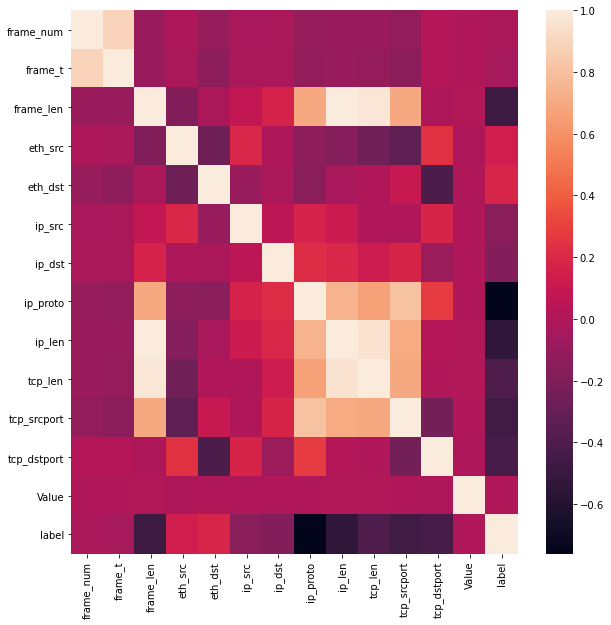

<matplotlib.axes._subplots.AxesSubplot at 0x7f859aca22b0>

In [0]:
# CORRELATION MATRIX
fig, ax = plt.subplots(figsize=(10,10))
corr = net_traffic_pd.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Here we can better see the relationship between two correlated features (ip_len and tcp_len)

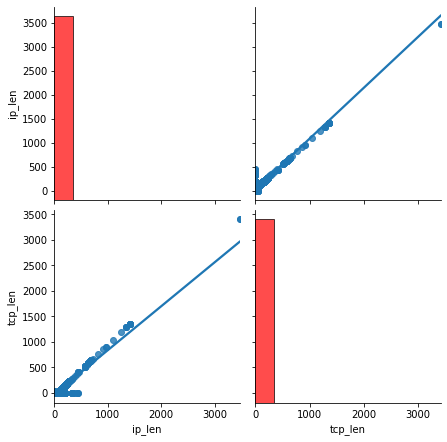

In [0]:
_ = sns.pairplot(net_traffic_pd[["ip_len", "tcp_len"]],
                 kind="reg",
                 diag_kind="hist", 
                 diag_kws={"color":"r", "alpha":0.7, "edgecolor":"k"},     
                 height=3
                 )

Below instead I show an example of distribution of unrelated features (eth_dst and tcp_dstport)

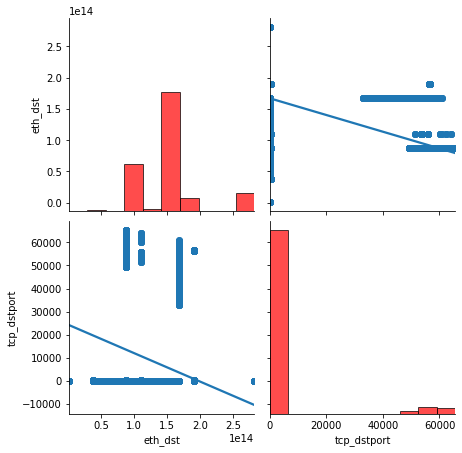

In [0]:
_ = sns.pairplot(net_traffic_pd[["eth_dst", "tcp_dstport"]],
                 kind="reg",
                 diag_kind="hist", 
                 diag_kws={"color":"r", "alpha":0.7, "edgecolor":"k"},     
                 height=3
                 )

As previously mentioned, a balancing operation was carried out on the labels as can be seen below.
The labels are numeric and represent these attacks or situations:



*   0 -> Normal
*   1 -> Wrong Setup
*   2 -> Distributed Denial of Service
*   3 -> Data type probing
*   4 -> Scan Attack
*   5 -> Man in the middle

In [0]:
net_traffic_renamed.groupBy("label").count().show()

+-----+-----+
label|count|
+-----+-----+
 1|82285|
 3|79002|
 5|79032|
 4|79052|
 2|79020|
 0|79035|
+-----+-----+

I can visualize the situation better using the seaborn library

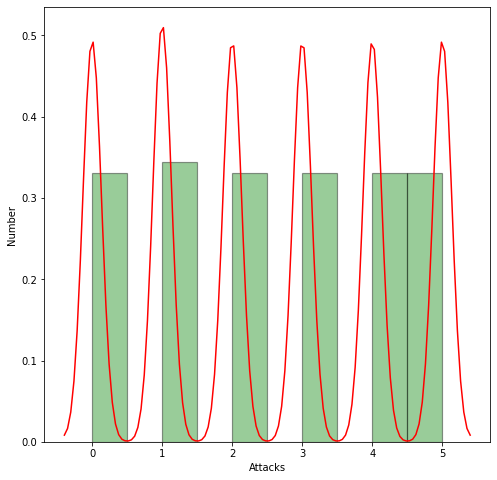

In [0]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

_ = sns.distplot(net_traffic_pd.label, 
                 bins=10, 
                 kde=True,
                 ax=ax, 
                 color="green", 
                 hist_kws={"edgecolor":"k", "linewidth":1.2},
                 kde_kws={"color": "r", "lw": 1.5}
                 )
_ = ax.set_xlabel("Attacks")
_ = ax.set_ylabel("Number")

I extract the input columns representing the features and the labels to be able to use them in subsequent models

In [0]:
inputsCols = net_traffic_renamed.select([c for c in net_traffic_renamed.columns if c not in {'label'}])
list_label = [row.label for row in net_traffic_renamed.groupBy("label").count().select("label").collect()]
list_label.sort()

### **Data analysis** ###

In the two sections below I will show two possible techniques for data processing. The first is a Machine Learning technique based on decision trees while the second is a Deep Learning technique specifically the use of a type of Neural Network called Recurrent (RNN) useful for capturing dependencies in a time series or sequence. In each of the sections there are further details. I chose these approaches inspired by various papers in which they were used for the development of a behavioral Intrusion Detection Systems.

# 1. RANDOM FOREST
https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forests

For the development of this model I used Pyspark and in particular MLlib a library that contains many functions and models for classification and regression activities. Random Forest is a decision tree-based ensemble method that achieves truly significant performance on this dataset in my experiments. I chose this method because I wanted to show one of its most important advantages over a black-box method like LSTM that is its interpretability. 

- I divide the dataset into training (80%) and testing (20%)

In [0]:
# SPLIT DATASET
train_df_RF, test_df_RF = net_traffic_renamed.randomSplit([0.8, 0.2], seed=RANDOM_SEED)

In [0]:
# Widget for choosing if execute Cross Validation
dbutils.widgets.dropdown('ExecuteCrossValidation', 'NO', ['YES', 'NO'])
ModelSelection = dbutils.widgets.get('ExecuteCrossValidation')

In [0]:
dbutils.widgets.removeAll()
print("Execute Model Selection?", ModelSelection)

Execute Model Selection? NO

### **Model selection** ### 
Here I create a pipeline that contains all the operations to be performed to return the best model after cross validation. The operations carried out are as follows:
- Assembly of all features in a single column using VectorAssembler
- I perform a data normalization through StandardScaler (mean = 0 and std_deviation = 1). This is to prevent PCA's problems with outliers
- Having previously seen that some features are related, I perform PCA to derive a subspace (8 features) less correlated from original features
- I cross-validate two Random Forest parameters maxDepth and numTrees
- In the end I return the best model

In [0]:
# Here I create a pipeline (assembler - scaler - PCA - Random Forest) and do cross-validation

def RandomForestCrossValidation(train_df_RF, inputsCols, k_fold = 5,  withStd=True, withMean=True, K = 8):
  """
    Args:
        train_df_RF: Training set
        inputsCols: Features
        k_fold: Number of folds in cross validation
        withStd: Scale to unit standard deviation
        withMean: Center data with mean
        K: Number of resulting features after PCA
    Return:
        cv_model: Best model according to cross validation
  """
  mlflow.sklearn.autolog()
 
  with mlflow.start_run():
    assembler = VectorAssembler(inputCols=inputsCols.columns, 
                                outputCol="features")
    
    scaler = StandardScaler(inputCol="features", 
                            outputCol="std_features",
                            withStd=withStd, withMean=withMean)
    
    pca_model = PCA(k=K, inputCol="std_features", outputCol="pca_features")

    randomForestClassifier = RandomForestClassifier(featuresCol="pca_features", labelCol="label", impurity='gini', seed=RANDOM_SEED)
 
    param_grid = ParamGridBuilder()\
      .addGrid(randomForestClassifier.maxDepth, [2, 3]) \
      .addGrid(randomForestClassifier.numTrees, [20, 30]) \
      .build()

    stages = [assembler] + [scaler] + [pca_model] + [randomForestClassifier]
    pipeline = Pipeline(stages=stages)
    
    cross_val = CrossValidator(estimator=pipeline,
                           estimatorParamMaps=param_grid,
                           evaluator=MulticlassClassificationEvaluator(metricName="f1"),
                           numFolds=k_fold 
                          )
   
    cv_model = cross_val.fit(train_df_RF)
    
    return cv_model

In [0]:
if ModelSelection == "YES":
  # In this case the cross validation is re-executed and at the end the new model will be saved on the dbfs
  cv_model = RandomForestCrossValidation(train_df_RF, inputsCols)
  # Since the path exists I have to override it using .write().overwrite()
  cv_model.bestModel.write().overwrite().save("dbfs:/FileStore/RandomForestModel")
  print("Best value of maxDept: maxDept=[{:d}]".
      format(cv_model.bestModel.stages[-1]._java_obj.getMaxDepth(), 
            )
      )
  print("Best value of numTrees: numTrees=[{:d}]".
        format(cv_model.bestModel.stages[-1]._java_obj.getNumTrees(), 
              )
        )
elif ModelSelection == "NO":
  # Load Pretrained Model
  cv_model = PipelineModel.load("dbfs:/FileStore/RandomForestModel")
  print("Best value of maxDept in pretrained model: maxDept=[{:d}]".
      format(cv_model.stages[-1]._java_obj.getMaxDepth(), 
            )
      )
  print("Best value of numTrees in pretrained model: numTrees=[{:d}]".
        format(cv_model.stages[-1]._java_obj.getNumTrees(), 
              )
        )

Best value of maxDept in pretrained model: maxDept=[3]
Best value of numTrees in pretrained model: numTrees=[20]

### **Interpretability of Random Forest** ###
Here I show through .toDebugString the decision-making process of each tree in the forest, this as mentioned above is one of the main advantages of this algorithm. A human being (even a non-expert) can understand the process by which a result has been reached and can make a decision accordingly. This in a real world scenario is definitely an advantage to consider, especially thinking of a domain as security where a manager has to make a decision based on the predictions of the model.

In [0]:
if ModelSelection == "YES":
  print(cv_model.bestModel.stages[-1].toDebugString)
elif ModelSelection == "NO":
  print(cv_model.stages[-1].toDebugString)

RandomForestClassificationModel: uid=RandomForestClassifier_2f2939bd31db, numTrees=20, numClasses=6, numFeatures=8
 Tree 0 (weight 1.0):
 If (feature 0 <= 2.3372497384570528)
 If (feature 4 <= 0.4328397317902133)
 If (feature 0 <= 0.16453101495568204)
 Predict: 2.0
 Else (feature 0 > 0.16453101495568204)
 Predict: 3.0
 Else (feature 4 > 0.4328397317902133)
 If (feature 6 <= 1.08183853120122)
 Predict: 0.0
 Else (feature 6 > 1.08183853120122)
 Predict: 4.0
 Else (feature 0 > 2.3372497384570528)
 If (feature 1 <= 1.873336011923958)
 If (feature 5 <= 0.8050649223924932)
 Predict: 1.0
 Else (feature 5 > 0.8050649223924932)
 Predict: 0.0
 Else (feature 1 > 1.873336011923958)
 Predict: 0.0
 Tree 1 (weight 1.0):
 If (feature 5 <= 0.5238872161096402)
 If (feature 0 <= 2.3372497384570528)
 If (feature 3 <= -0.3427078037532649)
 Predict: 2.0
 Else (feature 3 > -0.3427078037532649)
 Predict: 0.0
 Else (feature 0 > 2.3372497384570528)
 If (feature 7 <= 0.39315573832391326)
 Predict: 1.0
 Else (feature 7 > 0.39315573832391326)
 Predict: 0.0
 Else (feature 5 > 0.5238872161096402)
 If (feature 7 <= -0.8181585600030288)
 If (feature 0 <= -1.9769375087141232)
 Predict: 5.0
 Else (feature 0 > -1.9769375087141232)
 Predict: 0.0
 Else (feature 7 > -0.8181585600030288)
 If (feature 6 <= -0.07087970999321021)
 Predict: 4.0
 Else (feature 6 > -0.07087970999321021)
 Predict: 5.0
 Tree 2 (weight 1.0):
 If (feature 1 <= 1.873336011923958)
 If (feature 6 <= -1.0445021590969172)
 If (feature 7 <= 1.505855535714062)
 Predict: 3.0
 Else (feature 7 > 1.505855535714062)
 Predict: 4.0
 Else (feature 6 > -1.0445021590969172)
 If (feature 3 <= -0.3674827497969775)
 Predict: 2.0
 Else (feature 3 > -0.3674827497969775)
 Predict: 1.0
 Else (feature 1 > 1.873336011923958)
 If (feature 2 <= 1.2986028093530586)
 Predict: 0.0
 Else (feature 2 > 1.2986028093530586)
 If (feature 0 <= -2.210956530965606)
 Predict: 4.0
 Else (feature 0 > -2.210956530965606)
 Predict: 2.0
 Tree 3 (weight 1.0):
 If (feature 3 <= -0.3427078037532649)
 If (feature 7 <= -0.1389233567837722)
 If (feature 7 <= -0.44485264003589453)
 Predict: 2.0
 Else (feature 7 > -0.44485264003589453)
 Predict: 3.0
 Else (feature 7 > -0.1389233567837722)
 If (feature 7 <= 0.6933229630907581)
 Predict: 2.0
 Else (feature 7 > 0.6933229630907581)
 Predict: 4.0
 Else (feature 3 > -0.3427078037532649)
 If (feature 4 <= 0.4328397317902133)
 If (feature 5 <= 0.5238872161096402)
 Predict: 1.0
 Else (feature 5 > 0.5238872161096402)
 Predict: 5.0
 Else (feature 4 > 0.4328397317902133)
 If (feature 0 <= -1.515440170972931)
 Predict: 4.0
 Else (feature 0 > -1.515440170972931)
 Predict: 0.0
 Tree 4 (weight 1.0):
 If (feature 0 <= -1.515440170972931)
 If (feature 7 <= -0.8181585600030288)
 If (feature 3 <= 0.3878695409114227)
 Predict: 5.0
 Else (feature 3 > 0.3878695409114227)
 Predict: 0.0
 Else (feature 7 > -0.8181585600030288)
 If (feature 1 <= -2.047101759268456)
 Predict: 5.0
 Else (feature 1 > -2.047101759268456)
 Predict: 4.0
 Else (feature 0 > -1.515440170972931)
 If (feature 0 <= 2.3372497384570528)
 If (feature 3 <= -0.22358404791544456)
 Predict: 3.0
 Else (feature 3 > -0.22358404791544456)
 Predict: 0.0
 Else (feature 0 > 2.3372497384570528)
 If (feature 1 <= 1.873336011923958)
 Predict: 1.0
 Else (feature 1 > 1.873336011923958)
 Predict: 0.0
 Tree 5 (weight 1.0):
 If (feature 4 <= 0.4328397317902133)
 If (feature 3 <= -0.22358404791544456)
 If (feature 0 <= 0.16453101495568204)
 Predict: 2.0
 Else (feature 0 > 0.16453101495568204)
 Predict: 3.0
 Else (feature 3 > -0.22358404791544456)
 If (feature 0 <= 2.3372497384570528)
 Predict: 5.0
 Else (feature 0 > 2.3372497384570528)
 Predict: 1.0
 Else (feature 4 > 0.4328397317902133)
 If (feature 0 <= -1.515440170972931)
 If (feature 6 <= 1.08183853120122)
 Predict: 0.0
 Else (feature 6 > 1.08183853120122)
 Predict: 4.0
 Else (feature 0 > -1.515440170972931)
 If (feature 2 <= 2.4829866635654723)
 Predict: 0.0
 Else (feature 2 > 2.4829866635654723)
 Predict: 1.0
 Tree 6

### **Predictions and evaluation** ###

In [0]:
# RandomForest predictions on the testset
test_predictions = cv_model.transform(test_df_RF)
test_predictions = test_predictions.withColumn("label", test_predictions["label"].cast(DoubleType()))
test_predictions.select("prediction", "label").show(5)

+----------+-----+
prediction|label|
+----------+-----+
 0.0| 0.0|
 1.0| 1.0|
 0.0| 0.0|
 0.0| 0.0|
 0.0| 0.0|
+----------+-----+
only showing top 5 rows

In [0]:
evaluator_RandomForest_F1 = MulticlassClassificationEvaluator(metricName="f1")
print("Test set f1 = " + str(evaluator_RandomForest_F1.evaluate(test_predictions)))
evaluator_RandomForest_Acc = MulticlassClassificationEvaluator(metricName="accuracy")
print("Test set Accuracy = " + str(evaluator_RandomForest_Acc.evaluate(test_predictions)))

Test set f1 = 0.9471981695370206
Test set Accuracy = 0.9478965892902036

In [0]:
def evaluationRandomForest(goldTest, predictedTest):     
      """
        Args:
            goldTest: Gold Labels in the testset.
            predictedTest: Predicted Labels from my model.
      """
      confusionMatrix = confusion_matrix(goldTest, predictedTest, normalize="pred")
      print("F1 Score =", f1_score(goldTest, predictedTest, average='macro'))
      print(classification_report(goldTest, predictedTest))

      fig, ax = plt.subplots(figsize=(10,10))
      ax.set_title("Heatmap relating to Random Forest Confusion Matrix")
      sns.heatmap(confusionMatrix, annot=True,
                  xticklabels=list_label, yticklabels=list_label, linewidths=.5)
      plt.ylabel('Gold')
      plt.xlabel('Predicted')
      plt.show()

F1 Score = 0.9467951447322968
 precision recall f1-score support

 0.0 0.99 0.98 0.98 15673
 1.0 0.97 1.00 0.99 16622
 2.0 1.00 1.00 1.00 15827
 3.0 1.00 0.99 0.99 15838
 4.0 1.00 0.73 0.84 15811
 5.0 0.78 0.99 0.87 15693

 accuracy 0.95 95464
 macro avg 0.96 0.95 0.95 95464
weighted avg 0.96 0.95 0.95 95464

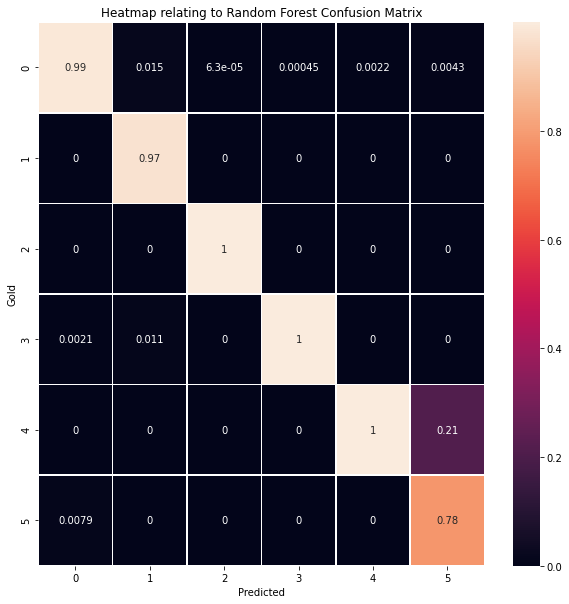

In [0]:
gold = test_predictions.select(['label']).collect()
predictions = test_predictions.select(['prediction']).collect()
evaluationRandomForest(gold,predictions)

# 2. LSTM
https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

For this second analysis I decided to use LSTM that is a recurring neural network that works well with sequential data and manages to capture long dependencies in the data then it can be useful in my scenario where I have a sequence of network packets each of which have a label associated that represents if there is a particular attack in that moment.
I was inspired by the following paper:

https://arxiv.org/pdf/1911.11552.pdf

In [0]:
displayHTML("<img src ='/files/LSTM.png'>")

In [0]:
# Widget for choosing which training mode to use
dbutils.widgets.dropdown('Training MODE', 'M2M', ['M2O', 'M2M'])
TrainMode = dbutils.widgets.get('Training MODE')
# Widget for choosing if execute training
dbutils.widgets.dropdown('ExecuteTraining', 'NO', ['YES', 'NO'])
Training = dbutils.widgets.get('ExecuteTraining')

In [0]:
dbutils.widgets.removeAll()
print("Training mode", TrainMode)
print("Execute Training?", Training)

Training mode M2O
Execute Training? NO

### **Vocabulary creation** ###
I create a vocabulary of categorical features (only one in my case) "ip protocol" so that I can use it to define an embedding layer in my model

In [0]:
def build_vocab_protocol(dataframe, min_freq=1):
    """
    Args:
        dataframe: Dataset 
        min_freq: Minimum frequency of protocols needed to be included in the vocabulary
    Return:
        Vocab object: Vocabulary of protocols with related indexes
    """
    counter = Counter()
    for i in range(len(dataframe)):
       counter[dataframe["ip_proto"][i]] += 1
    return Vocab(counter, min_freq=min_freq)

In [0]:
list_protocol = build_vocab_protocol(net_traffic_pd)

### **Features engineering and Data Preparation** ###
First of all I need to transform the dataset so that it contains the tensors representing the various inputs and the relative labels for each data packet

In [0]:
# I split the original dataset (70% training, 10% validation and 20% test)
train_df_LSTM, valid_df_LSTM, test_df_LSTM = net_traffic_renamed.randomSplit([0.7, 0.1, 0.2], seed=RANDOM_SEED)
# Convert to Pandas dataframe for easier management
train_df_p = train_df_LSTM.toPandas()
valid_df_p = valid_df_LSTM.toPandas()
test_df_p = test_df_LSTM.toPandas()

Here I create the structure of the dataset to pass to LSTM in particular I define the input and ip_proto features in a separate field because it must first be passed to an Embedding Layer. Furthermore, for each item of the dataset I add the relative label (Many-to-Many training) or I only add the last label at the end of the window and the others will be masked and will not be considered for the final evaluation (Many-to-One). Each field is converted to a tensor. In addition, the data is entered in a window so that you can take advantage of the capabilities of LSTM in working with sequences.

In [0]:
displayHTML("<img src ='/files/Training.png'>")

In [0]:
def prepare_input_LSTM(dataframe,vocab_proto, window_size = 20):
    """
    Args:
        dataframe: Dataset 
        vocab_proto: Vocabulary of protocols
        windows_size: Size of the window that is taken into account by LSTM
    Return:
        encoded_data: Final structure of the data that will be input to LSTM
    """
    encoded_data = []
    window = 0
    features = []
    labels = []
    protocol = []
    for i in range(len(dataframe)):
        if window == window_size:
          encoded_features = torch.FloatTensor(features).to('cpu')
          encoded_protocol = torch.tensor(protocol).to('cpu')
          encoded_labels = torch.tensor(labels).to('cpu')
          encoded_data.append({"inputs":encoded_features, "protocol":encoded_protocol, "outputs":encoded_labels})
          features = []
          labels = []
          protocol = []
          window = 0
        else:
          features.append([dataframe["frame_num"][i],
                          dataframe["frame_t"][i],
                          dataframe["frame_len"][i],
                          dataframe["eth_src"][i],
                          dataframe["eth_dst"][i],
                          dataframe["ip_src"][i],
                          dataframe["ip_dst"][i],
                          dataframe["ip_proto"][i],
                          dataframe["ip_len"][i],
                          dataframe["tcp_len"][i],
                          dataframe["tcp_srcport"][i],
                          dataframe["tcp_dstport"][i],
                          dataframe["Value"][i]])
          if TrainMode == "M2O":
            # Many-to-One
            if window == window_size - 1:
              labels.append(dataframe["label"][i])
            else:
              # 10 = MASK index
              labels.append(10)
          elif TrainMode == "M2M":
            # Many-to-Many
            labels.append(dataframe["label"][i])
          protocol.append(vocab_proto.stoi[dataframe["ip_proto"][i]])
          window += 1
    return encoded_data

In [0]:
train_tensor = prepare_input_LSTM(train_df_p, list_protocol)
valid_tensor = prepare_input_LSTM(valid_df_p, list_protocol)
test_tensor = prepare_input_LSTM(test_df_p, list_protocol)

In [0]:
print(train_tensor[0])

{'inputs': tensor([[ 1.0000e+00, 1.2372e+14, 5.4000e+01, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 4.0000e+01, 0.0000e+00,
 4.9279e+04, 8.0000e+01, -9.9000e+01],
 [ 2.0000e+00, 1.2372e+14, 6.2000e+01, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 4.8000e+01, 0.0000e+00,
 5.6521e+04, 8.0000e+01, -9.9000e+01],
 [ 4.0000e+00, 1.2372e+14, 5.4000e+01, 1.6728e+14, 8.7972e+13,
 1.9217e+09, 1.9217e+08, 6.0000e+00, 4.0000e+01, 0.0000e+00,
 8.0000e+01, 4.9279e+04, -9.9000e+01],
 [ 5.0000e+00, 1.2372e+14, 5.4000e+01, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 4.0000e+01, 0.0000e+00,
 5.6521e+04, 8.0000e+01, -9.9000e+01],
 [ 6.0000e+00, 1.2372e+14, 5.4000e+01, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 4.0000e+01, 0.0000e+00,
 4.9279e+04, 8.0000e+01, -9.9000e+01],
 [ 7.0000e+00, 1.2372e+14, 2.6900e+02, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 2.5500e+02, 2.1500e+02,
 5.6481e+04, 8.0000e+01, 6.1798e+01],
 [ 9.0000e+00, 1.2372e+14, 2.8800e+02, 1.6728e+14, 8.7972e+13,
 1.9217e+09, 1.9217e+08, 6.0000e+00, 2.7400e+02, 2.3400e+02,
 8.0000e+01, 5.6521e+04, -9.9000e+01],
 [ 1.0000e+01, 1.2372e+14, 5.4000e+01, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 4.0000e+01, 0.0000e+00,
 5.6521e+04, 8.0000e+01, -9.9000e+01],
 [ 1.1000e+01, 1.2372e+14, 5.4000e+01, 1.6728e+14, 8.7972e+13,
 1.9217e+09, 1.9217e+08, 6.0000e+00, 4.0000e+01, 0.0000e+00,
 8.0000e+01, 5.6521e+04, -9.9000e+01],
 [ 1.4000e+01, 1.2372e+14, 2.6900e+02, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 2.5500e+02, 2.1500e+02,
 5.5351e+04, 8.0000e+01, 6.1489e+01],
 [ 1.4000e+01, 1.2372e+14, 5.4000e+01, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 4.0000e+01, 0.0000e+00,
 5.6521e+04, 8.0000e+01, -9.9000e+01],
 [ 1.5000e+01, 1.2372e+14, 2.6900e+02, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 2.5500e+02, 2.1500e+02,
 5.6165e+04, 8.0000e+01, 6.0192e+01],
 [ 1.6000e+01, 1.2372e+14, 2.6900e+02, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 2.5500e+02, 2.1500e+02,
 5.6127e+04, 8.0000e+01, 6.0000e+01],
 [ 1.7000e+01, 1.2372e+14, 2.6900e+02, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 2.5500e+02, 2.1500e+02,
 5.5559e+04, 8.0000e+01, 5.9860e+01],
 [ 1.9000e+01, 1.2372e+14, 5.4000e+01, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 4.0000e+01, 0.0000e+00,
 5.6127e+04, 8.0000e+01, -9.9000e+01],
 [ 2.0000e+01, 1.2372e+14, 6.2000e+01, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 4.8000e+01, 0.0000e+00,
 5.2061e+04, 8.0000e+01, -9.9000e+01],
 [ 2.1000e+01, 1.2372e+14, 2.6900e+02, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 2.5500e+02, 2.1500e+02,
 5.3682e+04, 8.0000e+01, 5.9399e+01],
 [ 2.2000e+01, 1.2372e+14, 2.6900e+02, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 2.5500e+02, 2.1500e+02,
 5.7654e+04, 8.0000e+01, 6.0000e+01],
 [ 2.3000e+01, 1.2372e+14, 2.6900e+02, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 2.5500e+02, 2.1500e+02,
 5.2491e+04, 8.0000e+01, 5.9289e+01],
 [ 2.4000e+01, 1.2372e+14, 2.6900e+02, 8.7972e+13, 1.6728e+14,
 1.9217e+08, 1.9217e+09, 6.0000e+00, 2.5500e+02, 2.1500e+02,
 5.2171e+04, 8.0000e+01, 5.9027e+01]]), 'protocol': tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]), 'outputs': tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
 10, 1])}

### **Model definition** ###

In [0]:
class Hyperparams():
    # List of Hyperparameters for my model
    def __init__(self):
        self.input = len(inputsCols.columns) 
        self.protocol = len(list_protocol) 
        self.hiddenSize = 78
        self.embedding_dim = 100
        self.labels = len(list_label)
        self.bidirectional = True
        self.layers = 2
        self.dropout = 0.1

In [0]:
class LSTM_NN(nn.Module):
    def __init__(self, params):
        super(LSTM_NN, self).__init__()
        pprint(params)

        # Embedding Layer for ip_proto
        self.embeddingsProtocol = nn.Embedding(params.protocol, params.embedding_dim)
        
        # BI-LSTM LAYER && intermediate DROPOUT
        self.lstm = nn.LSTM(params.input + self.embeddingsProtocol.embedding_dim, params.hiddenSize,
                            bidirectional=params.bidirectional,
                            num_layers=params.layers,
                            dropout=params.dropout if params.layers > 1 else 0,
                            batch_first=True)

        lstmOutput = params.hiddenSize if params.bidirectional is False else params.hiddenSize * 2

        # FINAL DROPOUT LAYER
        self.dropout = nn.Dropout(params.dropout)

        # CLASSIFIER LAYER
        self.classifier = nn.Linear(lstmOutput, params.labels)

    def forward(self, x, protocol):

        emb = self.embeddingsProtocol(protocol)
        # I concatenate the inputs with the output of the embedding layer
        inputLstm = torch.cat((x, emb), dim=2)
        output, (h, c) = self.lstm(inputLstm)
        output = self.dropout(output)
        outputModel = self.classifier(output)
        return outputModel

In [0]:
params = Hyperparams()
LSTM_Model = LSTM_NN(params).cpu()
print(LSTM_Model)

<__main__.Hyperparams object at 0x7f85756970d0>
LSTM_NN(
 (embeddingsProtocol): Embedding(7, 100)
 (lstm): LSTM(113, 78, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
 (dropout): Dropout(p=0.1, inplace=False)
 (classifier): Linear(in_features=156, out_features=6, bias=True)
)

### **Model Training** ###
I load the dataset previously created with Dataloader in batches of length 60, in training I add the shuffle parameter to avoid overfitting

In [0]:
train_dataset = DataLoader(train_tensor, batch_size=60, shuffle=True)
valid_dataset = DataLoader(valid_tensor, batch_size=60)
test_dataset = DataLoader(test_tensor, batch_size=60)

This class is for model training, each batch is passed to the network and then the Cross-Entropy Loss is calculated. Same procedure for the validation set. At the end a graph is plotted showing the trend of the two losses on training and validation.

In [0]:
class TrainingLSTM():
    """Class for training lstm"""

    def evaluate(self,validDataset, lossFunction, model):
        """
        Args:
            validDataset: Validation set
            lossFunction: Loss function used during the training
            model: LSTM model
        Return:
            Validation loss relative to the current epoch
        """
        valid_loss = 0.0
        model.eval()
        with torch.no_grad():
            for sample in validDataset:
                inputs = sample['inputs']
                protocol = sample['protocol'].int()
                labels = sample['outputs']
                
                predictions = model(inputs, protocol)
                predictions = predictions.view(-1, predictions.shape[-1])
                labels = labels.view(-1)
                sample_loss = lossFunction(predictions, labels.long())
                valid_loss += sample_loss.tolist()
        
        return valid_loss / len(validDataset)
      
    def training(self, train, valid, optimizer, lossFunction, model):
        """
        Args:
            train: Training set
            valid: Validation set
            optimizer: Learning Algorithm
            lossFunction: Loss function used during the training
            model: LSTM model
        Return:
            avg_epoch_loss: Average loss during an epoch
        """
        epochs = 15

        trainLoss, valLoss = [],[]
        train_loss = 0.0
        print('Training ...')

        for epoch in range(epochs):
            print(' Epoch {:03d}'.format(epoch + 1))
            epoch_loss = 0.0
            model.train()
            for step, sample in enumerate(train):
                inputs = sample['inputs']
                protocol = sample['protocol'].int()
                labels = sample['outputs']
                optimizer.zero_grad()
                predictions = model(inputs, protocol)
                predictions = predictions.view(-1, predictions.shape[-1])
                labels = labels.view(-1)
                single_loss = lossFunction(predictions, labels.long())

                single_loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
                optimizer.step()

                epoch_loss += single_loss.tolist()

            avg_epoch_loss = epoch_loss / len(train)
            train_loss += avg_epoch_loss
            print('\t[E: {:2d}] train loss = {:0.4f}'.format(epoch, avg_epoch_loss))

            valid_loss = self.evaluate(valid, lossFunction, model)
            print('  [E: {:2d}] valid loss = {:0.4f}'.format(epoch, valid_loss))

            trainLoss.append(avg_epoch_loss)
            valLoss.append(valid_loss)

        # Plot the loss graph here
        plt.plot(trainLoss, label='Training Loss')
        plt.plot(valLoss, label='Validation Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(frameon=True)

        avg_epoch_loss = train_loss / epochs
        return avg_epoch_loss
      

I initialize the loss function based on the type of training chosen

In [0]:
if TrainMode == "M2M":
  # Many-to-Many
  loss_function = nn.CrossEntropyLoss()
elif TrainMode == "M2O":
  # Many-to-One
  loss_function = nn.CrossEntropyLoss(ignore_index=10)

In [0]:
model = LSTM_Model
if Training == "YES":
  TrainingLSTM = TrainingLSTM()
  optimizer = torch.optim.Adam(model.parameters())
  TrainingLSTM.training(train_dataset, valid_dataset, optimizer, loss_function, model)
elif Training == "NO" and TrainMode == "M2M":
  # Only the first time if the training has been rerun 
  #dbutils.fs.cp("dbfs:/FileStore/LSTMTrained_M2M.pth", "file:/tmp/LSTMTrained_M2M.pth")
  map_location = torch.device('cpu') 
  model.load_state_dict(torch.load("/tmp/LSTMTrained_M2M.pth", map_location))
elif Training == "NO" and TrainMode == "M2O":
  # Only the first time if the training has been rerun
  #dbutils.fs.cp("dbfs:/FileStore/LSTMTrained_M2O.pth", "file:/tmp/LSTMTrained_M2O.pth")
  map_location = torch.device('cpu')
  model.load_state_dict(torch.load("/tmp/LSTMTrained_M2O.pth", map_location))

### **Evaluation** ###
Here I create a class for the final assessment on the testset. Through the first function takeArrayGoldPredicted() I take the Gold values and those predicted by the model (this using predict function that give prediction by the trained model related to testset inputs). Through the second evaluationModel() calculation the final f1 score and plot the relative confusion matrix

In [0]:
class Evaluation():
    """Class for evaluate model"""

    def __init__( self, testset, labels, model):

      self.testset = testset
      self.labels = labels

    def takeArrayGoldPredicted(self):
      """
        Returns:
            goldTest: Gold Labels in the testset.
            predictedTest: Predicted Labels from my model.
      """
      goldTest = []
      predictedTest = []

      for i in range(len(self.testset)):

          itemTest = self.testset[i]

          testInputs, protocol, testOutputs = itemTest["inputs"], itemTest['protocol'].int(), itemTest["outputs"].cpu().numpy()
          
          logits, predictions = self.predict(testInputs, protocol, model)
          decode_predictions = predictions.cpu().numpy()[0]
          for gold, predicted in zip(testOutputs, decode_predictions):
            if TrainMode == "M2O":
              # Many-to-One
              # Elements with MASK label excluded from final evaluation
              if gold != 10:
                goldTest.append(gold)
                predictedTest.append(predicted)
            elif TrainMode == "M2M":
              # Many-to-Many
              goldTest.append(gold)
              predictedTest.append(predicted)

      return goldTest, predictedTest    
    
    def evaluationModel(self, goldTest, predictedTest):     
      """
        Args:
            goldTest: Gold Labels in the testset.
            predictedTest: Predicted Labels from my model.
      """
      confusionMatrix = confusion_matrix(goldTest, predictedTest, normalize="pred")
      print("F1 Score =", f1_score(goldTest, predictedTest, average='macro'))
      print(classification_report(goldTest, predictedTest))

      fig, ax = plt.subplots(figsize=(10,10))
      ax.set_title("Heatmap relating to LSTM Confusion Matrix")
      sns.heatmap(confusionMatrix, annot=True,
                  xticklabels=self.labels, yticklabels=self.labels, linewidths=.5)
      plt.ylabel('Gold')
      plt.xlabel('Predicted')
      plt.show()
      
    def predict(self, inputs, protocol, model):
      """
        Args:
            inputs: Testset inputs
            protocol: Protocol inputs from testset
            model: LSTM model
        Return:
           logits: Raw model predictions
           predictions: Maximum of model logits (most likely label)
      """
      model.eval()
      with torch.no_grad():
          logits = model(inputs.unsqueeze(0), protocol.unsqueeze(0))
          predictions = torch.argmax(logits, -1)
          return logits, predictions 


F1 Score = 0.9076769269163821
 precision recall f1-score support

 0 0.92 0.53 0.67 736
 1 0.70 0.96 0.81 811
 2 0.98 1.00 0.99 744
 3 0.99 0.98 0.99 752
 4 0.99 1.00 1.00 746
 5 0.98 1.00 0.99 756

 accuracy 0.91 4545
 macro avg 0.93 0.91 0.91 4545
weighted avg 0.93 0.91 0.91 4545

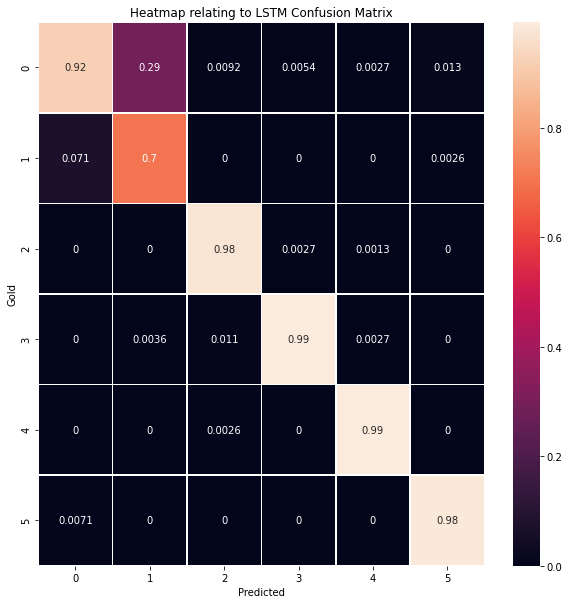

In [0]:
Evaluation = Evaluation(test_tensor, list_label, model)
goldTest, predictedTest = Evaluation.takeArrayGoldPredicted() 
Evaluation.evaluationModel(goldTest, predictedTest)

In [0]:
# Once the training is done, save the models in the dbfs
if Training == "YES" and TrainMode == "M20":
  torch.save(LSTM_Model.state_dict(), '/tmp/LSTMTrained_M2O.pth', _use_new_zipfile_serialization=False)
  dbutils.fs.mv("file:/tmp/LSTMTrained_M2O.pth", "dbfs:/FileStore/LSTMTrained_M2O.pth")
if Training == "YES" and TrainMode == "M2M":
  torch.save(LSTM_Model.state_dict(), '/tmp/LSTMTrained_M2M.pth', _use_new_zipfile_serialization=False)
  dbutils.fs.mv("file:/tmp/LSTMTrained_M2M.pth", "dbfs:/FileStore/LSTMTrained_M2M.pth")

# References

Pyspark Random Forest: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forests

Network Intrusion Detection Systems with LSTM and Embeddings: https://arxiv.org/pdf/1911.11552.pdf 

LSTM Pytorch: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html

Embeddings Pytorch: https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

Wireshark: https://www.wireshark.org/

Datasets: https://www.kaggle.com/speedwall10/iot-device-network-logs

Github Repository: https://github.com/TobI33/IoT-Intrusion-Detection